In [53]:
import imageio
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [54]:
file = open("filter.txt", "r")

matrix_filter = []

for row in file:
    values = row.split()
    matrix_filter.append(values)
    
file.close()

print(len(matrix_filter), len(matrix_filter[0]))

for row in range(len(matrix_filter)):
    for column in range(len(matrix_filter[0])):
        matrix_filter[row][column] = float(matrix_filter[row][column])


3 5


In [55]:
matrix_filter = np.array(matrix_filter)
matrix_filter

array([[0.0625, 0.125 , 0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 , 0.125 , 0.0625],
       [0.0625, 0.125 , 0.0625, 0.125 , 0.0625]])

## Funções para plotar

In [56]:
# Plota 1 imagem

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
# Plota as 2 imagens
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

## Carrega a imagem e aplica a cor cinza

(224, 224)


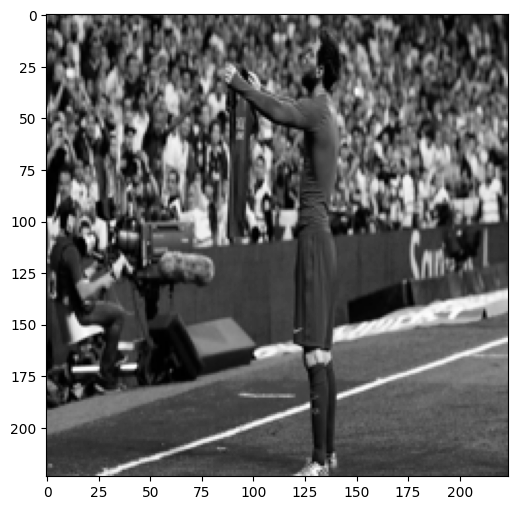

In [57]:
img = Image.open('messi.webp')
img = ImageOps.grayscale(img)
img = img.resize(size=(224, 224))
plot_image(img=img)
print(np.array(img).shape)

## Calcula quantos filtros você pode aplicar na imagem

In [58]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    print("kernel: ", kernel_size)
    
    for i in range(img_size):
        added = i + kernel_size
  
        if added <= img_size:
            num_pixels += 1
            
    print(num_pixels)
            
    return num_pixels

In [59]:
calculate_target_size(img_size=224, kernel_size=3)

kernel:  3
222


222

## Função para aplicar a convolução

In [85]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    
    kernel_size = 0
    
    if len(kernel) > len(kernel[0]):
        kernel_size = len(kernel)
    else:
        kernel_size = len(kernel[0])

    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel_size
    )

    k = kernel.shape[0]
    l = kernel.shape[1]
    
    active = False
    
    if k == l:
        active = True
    
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    for i in range(tgt_size):
    
        for j in range(tgt_size):
            
            mat = img[i:i+k, j:j+l]
                        
            if active:
                convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            else:

                if not mat.shape[1] == k:
                    convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
                else:
                    pass
            
               
        
            
            
    return convolved_img

In [86]:
img_sharpened = convolve(img=np.array(img), kernel=matrix_filter)
img_sharpened.shape

kernel:  5
220


(220, 220)

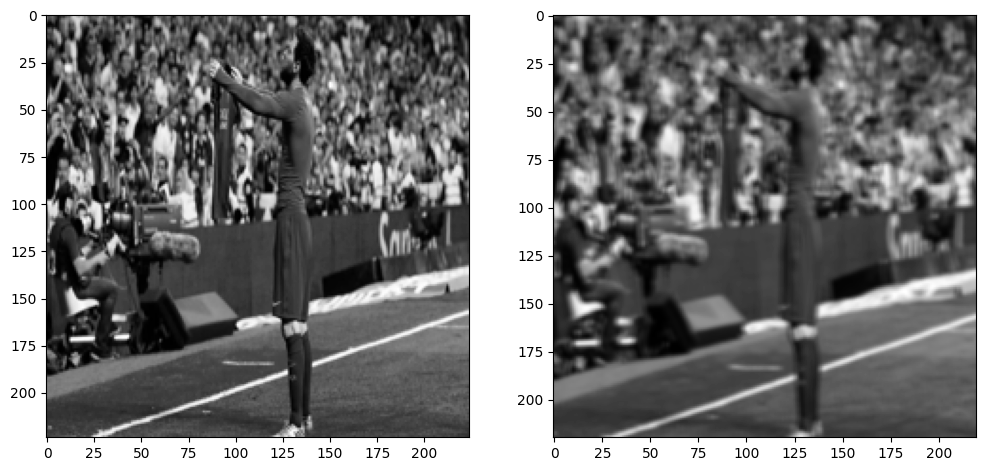

In [87]:
plot_two_images(
    img1=img, 
    img2=img_sharpened
)

## Corrigindo o problema do padding

In [35]:
def get_padding_width_per_side(kernel_size: int) -> int:

    return kernel_size // 2

In [36]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  
        img.shape[1] + padding_width * 2
    ))
    
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding

In [37]:
pad_3x3 = get_padding_width_per_side(kernel_size=5)

(228, 228)


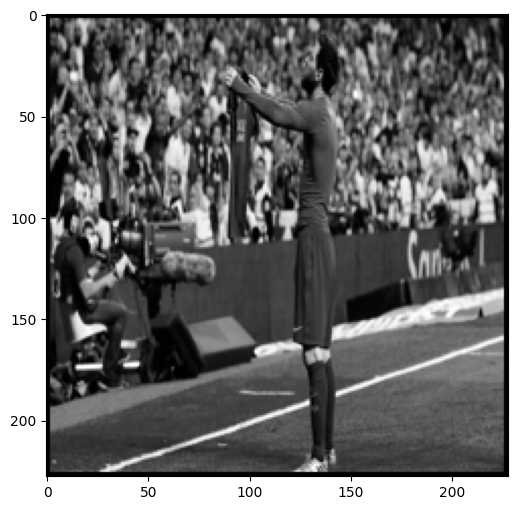

In [38]:
img_with_padding_3x3 = add_padding_to_image(
    img=np.array(img), 
    padding_width=pad_3x3
)

print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

kernel:  5
224
shape:  (224, 224)


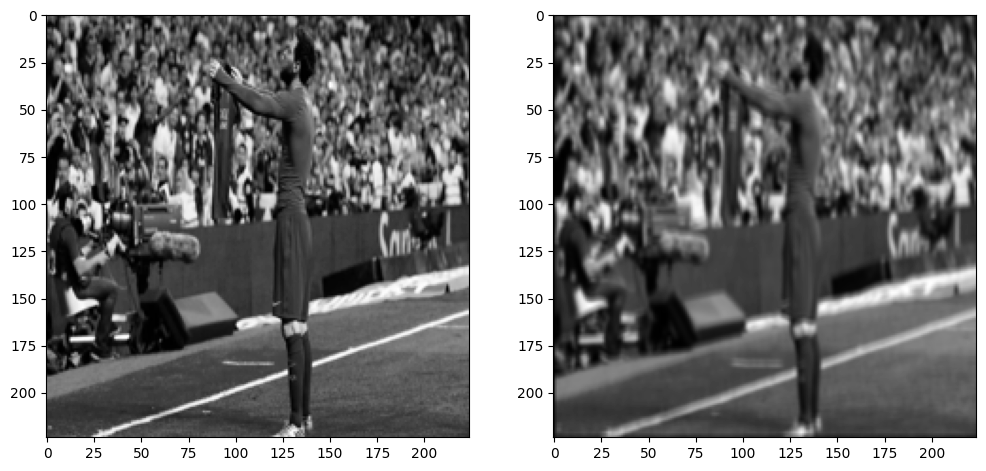

In [39]:
img_padded_3x3_sharpened = convolve(img=img_with_padding_3x3, kernel=matrix_filter)
print('shape: ', img_padded_3x3_sharpened.shape)

plot_two_images(
    img1=img, 
    img2=img_padded_3x3_sharpened
)